### Hyperparameter optimization for XGboost using RandamizedSearchCV

In [163]:
## import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [165]:
## Load the Dataset 
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We can drop Row number, customerId, Surname, Since these are not important features for predicting O/P

In [168]:
df.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### We will convert the categorical features 'Geography' and 'Gender' into numerical variables

In [171]:
geography=pd.get_dummies(df['Geography'],drop_first=True,dtype=int)
gender = pd.get_dummies(df['Gender'],drop_first=True,dtype=int)

In [173]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [175]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


Now we will drop 'Gender' and 'Geography' features from data frame and concat these two encoded features

In [178]:
df.drop(['Gender','Geography'],axis=1,inplace=True)

In [180]:
df=pd.concat([df,gender,geography],axis=1)

In [182]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


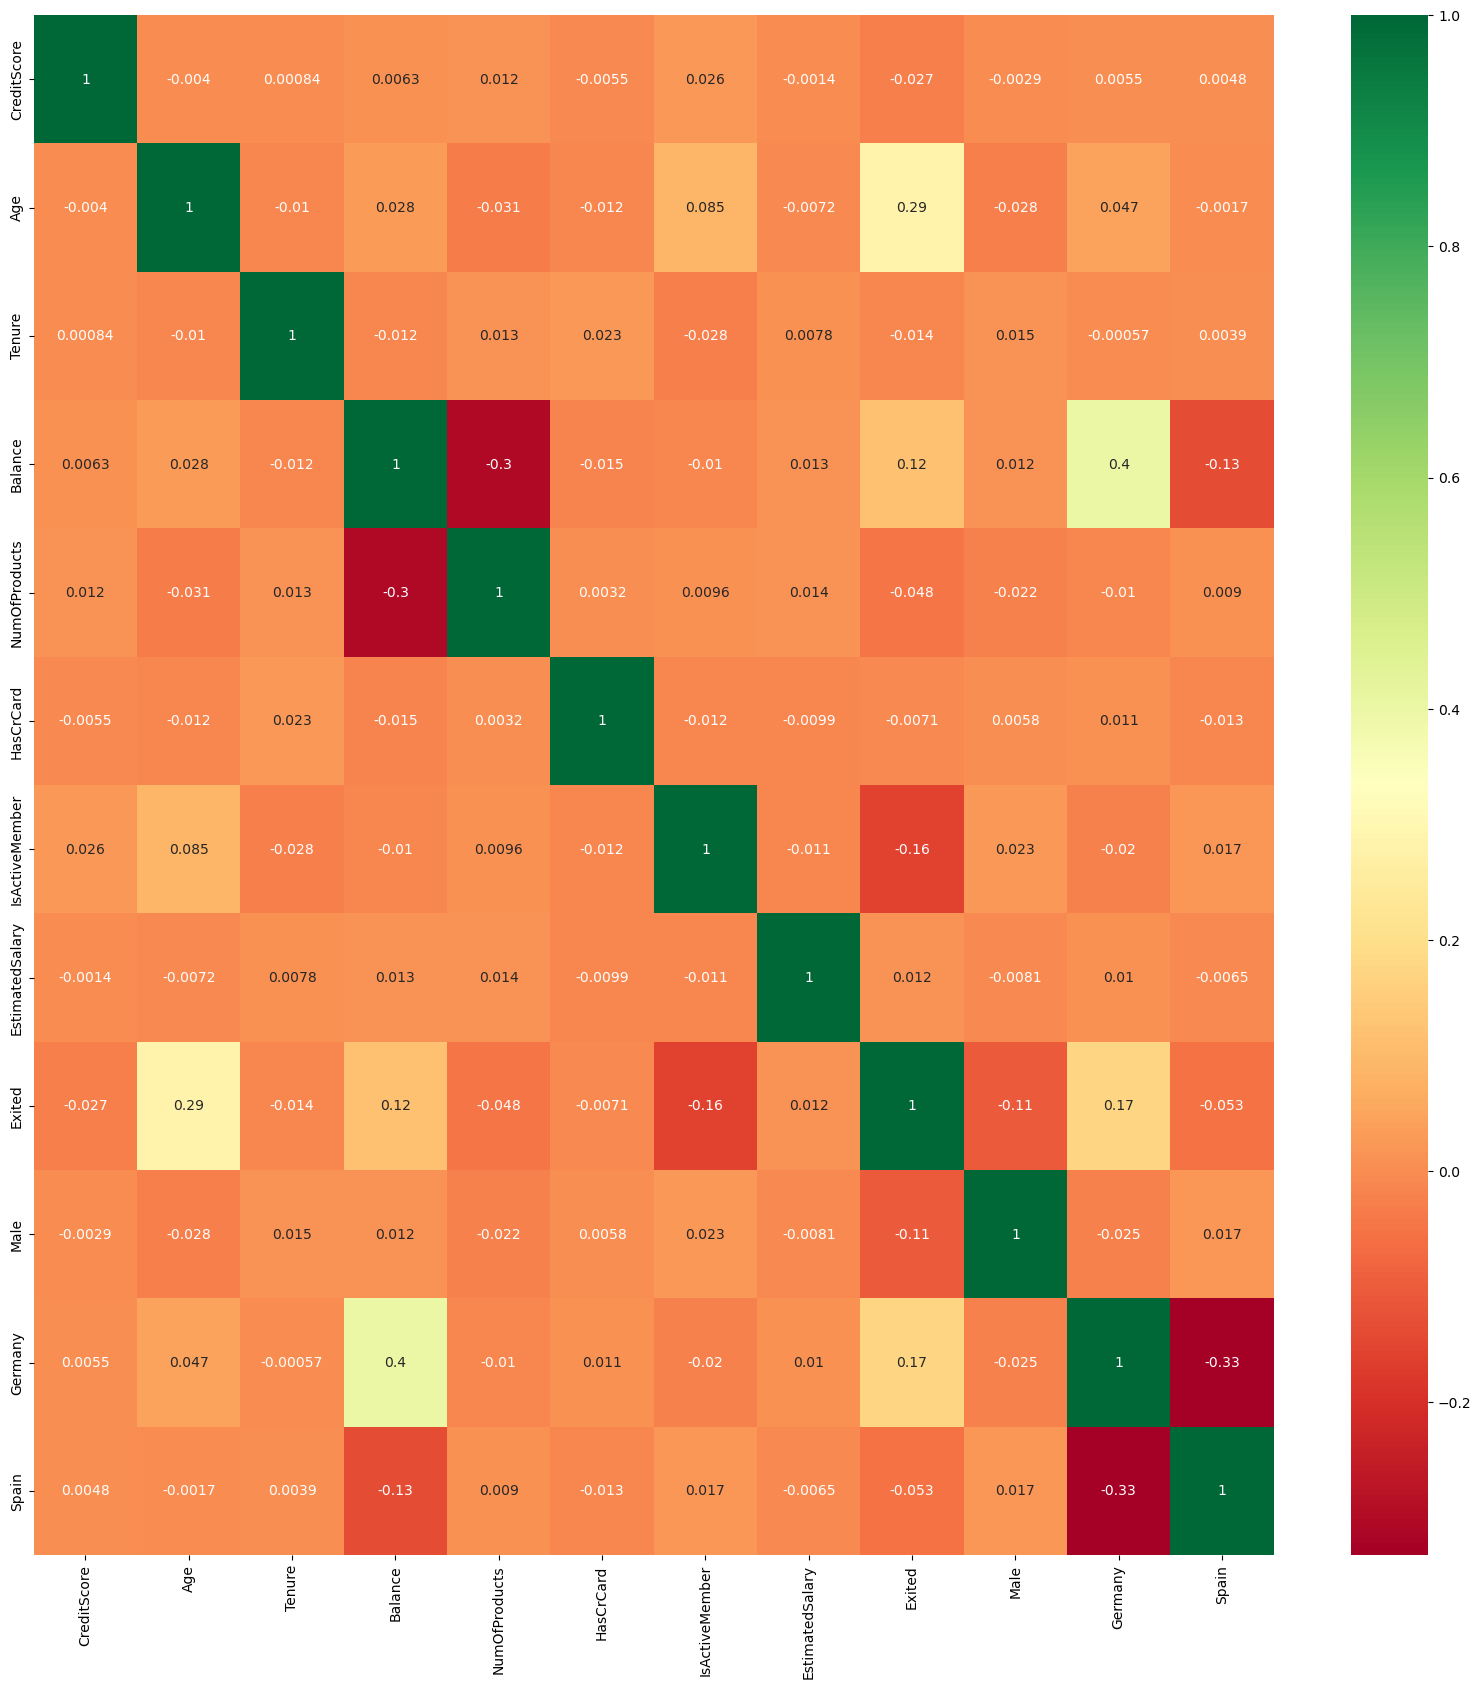

In [188]:
## correlation 
corrmat = df.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')
plt.show()

In [190]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

##### We will split the data into train and test

In [192]:
x=df.drop('Exited',axis=1)
y=df.iloc[:,8]

In [194]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [198]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [200]:
## import train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [204]:
## Hyperparameter optimization 
from sklearn.model_selection import RandomizedSearchCV

In [208]:
import xgboost

In [210]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [212]:
classifier = xgboost.XGBClassifier()

In [214]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [216]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [218]:
from datetime import datetime

start_time = timer(None) # timing start from this  point fro start_time variable
random_search.fit(x_train,y_train)
timer(start_time)        # timing ends here for the timing variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.867 total time=   0.2s
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.866 total time=   0.2s
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.860 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.854 total time=   0.2s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.889 total time=   0.3s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=5;, score=0.836 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3;, score=0.856 total time=   0.2s
[CV 1/5] END colsample_

In [220]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
5241,574,41,1,0.00,2,0,0,70550.00,1,0,0
5911,752,33,4,0.00,2,1,1,39570.78,1,0,0
7312,629,43,0,0.00,2,1,1,41263.69,0,0,0
6853,685,43,1,132667.17,1,1,1,41876.98,0,0,0
1309,591,30,8,124857.69,2,0,0,50485.70,1,0,1


In [222]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [226]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [231]:
classifier=xgboost.XGBClassifier(**random_search.best_estimator_.get_params())

In [245]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [247]:
y_pred=classifier.predict(x_test)

In [249]:
from sklearn.metrics import confusion_matrix,classification_report

In [253]:
print(confusion_matrix(y_test,y_pred))

[[2250  118]
 [ 337  295]]


In [255]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2368
           1       0.71      0.47      0.56       632

    accuracy                           0.85      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.84      0.85      0.84      3000



In [257]:
from sklearn.model_selection import  cross_val_score

In [263]:
score = cross_val_score(classifier,x_test,y_test,cv=10)

In [265]:
score

array([0.86666667, 0.87333333, 0.84333333, 0.83333333, 0.83333333,
       0.85666667, 0.83666667, 0.84666667, 0.88333333, 0.85      ])

In [267]:
score.mean()

0.8523333333333334